In [6]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# set the random seed - consistent
rs = 10

In [7]:
import pickle
with open('data.pickle', 'rb') as f:
    best_dt, X, X_v2_train, X_v2_test, Y_v2_train, Y_v2_test = pickle.load(f)
X_train, X_test, y_train, y_test = X_v2_train, X_v2_test, Y_v2_train, Y_v2_test

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

Build a Neural Network model using the default setting.

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.7166085946573751
Test accuracy: 0.6612466124661247
              precision    recall  f1-score   support

           0       0.90      0.43      0.58       202
           1       0.58      0.94      0.72       167

    accuracy                           0.66       369
   macro avg       0.74      0.69      0.65       369
weighted avg       0.75      0.66      0.64       369

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


C:\Users\Ben\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
model_2 = MLPClassifier(max_iter=700, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 0.7154471544715447
Test accuracy: 0.6585365853658537
              precision    recall  f1-score   support

           0       0.90      0.43      0.58       202
           1       0.58      0.94      0.71       167

    accuracy                           0.66       369
   macro avg       0.74      0.68      0.65       369
weighted avg       0.75      0.66      0.64       369

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=700,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [12]:
print(X_train.shape)

(861, 17)


Refine this network by tuning it with GridSearchCV.

In [13]:
params = {'hidden_layer_sizes': [(x,) for x in range(1, 16)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,
                                                               max_iter=2000),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=2000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=10, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'

Total number of models:  15


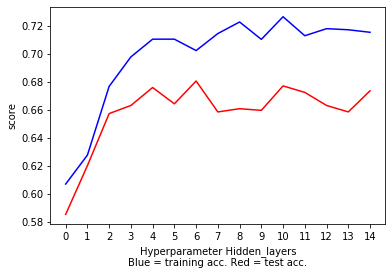

In [14]:
result_set = cv_1.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)))
plt.ylabel('score')
plt.show()

In [15]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.7049941927990708
Test accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.89      0.45      0.59       202
           1       0.58      0.93      0.72       167

    accuracy                           0.67       369
   macro avg       0.74      0.69      0.66       369
weighted avg       0.75      0.67      0.65       369

{'hidden_layer_sizes': (7,)}


In [16]:
params = {'hidden_layer_sizes': [(x,) for x in range(1, 8)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,max_iter=1500), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.7049941927990708
Test accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.89      0.45      0.59       202
           1       0.58      0.93      0.72       167

    accuracy                           0.67       369
   macro avg       0.74      0.69      0.66       369
weighted avg       0.75      0.67      0.65       369

{'alpha': 0.01, 'hidden_layer_sizes': (7,)}


In [17]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train)

print(rfe.n_features_)

8


In [18]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# step = int((X_train_rfe.shape[1] + 5)/5);
params = {'hidden_layer_sizes': [(x,) for x in range(1, 8)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

rfe_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,max_iter=2000), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_rfe, y_train)

print("Train accuracy:", rfe_cv.score(X_train_rfe, y_train))
print("Test accuracy:", rfe_cv.score(X_test_rfe, y_test))

y_pred = rfe_cv.predict(X_test_rfe)
print(classification_report(y_test, y_pred))

print(rfe_cv.best_params_)

Train accuracy: 0.667828106852497
Test accuracy: 0.6341463414634146
              precision    recall  f1-score   support

           0       0.78      0.47      0.58       202
           1       0.56      0.84      0.67       167

    accuracy                           0.63       369
   macro avg       0.67      0.65      0.63       369
weighted avg       0.68      0.63      0.62       369

{'alpha': 0.01, 'hidden_layer_sizes': (6,)}


Build another Neural
Network model with reduced features set.

In [19]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(best_dt.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(861, 5)


In [20]:
from dm_tools import analyse_feature_importance

# analyse feature importance from the tuned decision tree
analyse_feature_importance(best_dt.best_estimator_, X.columns)

Patient age quantile : 0.540999319595017
Leukocytes : 0.11401900142708796
Influenza A rapid test_positive : 0.09092632304868112
Eosinophils : 0.07812752721962032
Influenza B rapid test_positive : 0.06660912173728993
Proteina C reativa : 0.039587531561483404
Monocytes : 0.035079983793024926
Mean corpuscular hemoglobin concentration : 0.019566153929693
Lymphocytes : 0.013844970558698018
Influenza B rapid test_negative : 0.0010962348918244266
Influenza A rapid test_negative : 0.00014383223757982562
Mean corpuscular volume : 0.0
Platelets : 0.0
Red blood Cells : 0.0
Red blood cell distribution width : 0.0
Mean platelet volume : 0.0
Basophils : 0.0


In [25]:
params = {'hidden_layer_sizes': [(x,) for x in range(1, 5)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

### For the params given, build a logistic regression model with GridSearch.

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,max_iter=2000), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.6608594657375145
Test accuracy: 0.6341463414634146
              precision    recall  f1-score   support

           0       0.80      0.44      0.57       202
           1       0.56      0.87      0.68       167

    accuracy                           0.63       369
   macro avg       0.68      0.65      0.63       369
weighted avg       0.69      0.63      0.62       369

{'alpha': 0.01, 'hidden_layer_sizes': (4,)}


A total of seven models has been built:
    1. Default neural network (`model_1`)
    2. Converged Neural network  (`model_2`)
    3. Neural network + grid search (`cv_1`)
    4. Neural network + grid search (`cv_2`)
    5. Neural network + feature selection using DT + grid search (`cv_sel_model`)
    6. Neural network + feature selection + grid search (`rfe_cv`)
    

In [26]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_rfe)



roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for Converged NN:", roc_index_nn_2)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)
print("ROC index on test for NN with feature selection and gridsearch:", roc_index_rfe_cv)


from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])


ROC index on test for NN_default: 0.7410476077547874
ROC index on test for Converged NN: 0.746976344341021
ROC index on test for NN with gridsearch 1: 0.7301683761190491
ROC index on test for NN with gridsearch 2: 0.7286269046066283
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.7087952807256773
ROC index on test for NN with feature selection and gridsearch: 0.7136864884093199


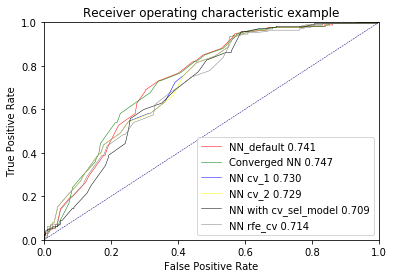

In [28]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='Converged NN {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='NN rfe_cv {:.3f}'.format(roc_index_rfe_cv), color='gray', lw=0.5)



plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [33]:
best_nn = model_2
with open('best_nn.pickle', 'wb') as f:
    pickle.dump([roc_index_nn_2,fpr_nn_2, tpr_nn_2], f)